In [345]:
import numpy as np
import pandas as pd
import datetime as dt
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [346]:
data = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
submit = pd.read_csv("sample_submission.csv")

In [347]:
submit.head(2)

,session_id,gender
0,u12112,female
1,u19725,male


In [348]:
submit.drop(['session_id','gender'], axis=1, inplace =True)

In [349]:
submit["session_id"] = test.session_id

In [350]:
data.shape, test.shape, submit.shape

((10500, 5), (4500, 4), (4500, 1))

In [351]:
data.head(3)

,session_id,startTime,endTime,ProductList,gender
0,u16159,15/12/14 18:11,15/12/14 18:12,A00002/B00003/C00006/D28435/;A00002/B00003/C00...,female
1,u10253,16/12/14 14:35,16/12/14 14:41,A00001/B00009/C00031/D29404/;A00001/B00009/C00...,male
2,u19037,01/12/14 15:58,01/12/14 15:58,A00002/B00001/C00020/D16944/,female


In [352]:
data.ProductList[0]

'A00002/B00003/C00006/D28435/;A00002/B00003/C00006/D02554/;A00002/B00003/C00006/D28436/;A00002/B00003/C00006/D28437/'

In [353]:
len(data.ProductList[1].split(';'))

7

In [354]:
num_of_prod = []
for i in range(data.shape[0]):
    num_of_prod.append(len(data.ProductList[i].split(';')))

In [355]:
data["product_count"] = num_of_prod

In [356]:
data.drop(['ProductList'], axis=1, inplace=True)

In [357]:
data.drop(['session_id'], axis=1, inplace=True)

In [358]:
data.startTime[0].split(' ')[1]

'18:11'

In [359]:
# int(int(l.split(':')[0]) - int(st.split(':')[0]))*(60)

In [360]:
# time_spent = []
# for i in range(data.shape[0]):
#     st = data.startTime[i].split(' ')[1]
#     end =data.endTime[i].split(' ')[1]
#     tot_mins = (int(end.split(':')[0]) - int(st.split(':')[0]))*60 + int(end.split(':')[1]) - int(st.split(':')[1])
#     time_spent.append(tot_mins)

In [361]:
# data["time_spent"] = time_spent

In [362]:
# data[data.time_spent x== -1438]

In [363]:
time_spent = []
for i in range(data.shape[0]):
    start_dt = dt.datetime.strptime(data.startTime[i].split(' ')[1], '%H:%M')
    end_dt = dt.datetime.strptime(data.endTime[i].split(' ')[1], '%H:%M')
    diff = end_dt - start_dt
    time_spent.append(diff.seconds/60)

In [364]:
data["time_spent"] = time_spent

In [365]:
data.head(4)

,startTime,endTime,gender,product_count,time_spent
0,15/12/14 18:11,15/12/14 18:12,female,4,1.0
1,16/12/14 14:35,16/12/14 14:41,male,7,6.0
2,01/12/14 15:58,01/12/14 15:58,female,1,0.0
3,23/11/14 2:57,23/11/14 3:00,female,3,3.0


In [366]:
data.time_spent.describe()

count    10500.000000
mean         8.816286
std         84.637362
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max       1425.000000
Name: time_spent, dtype: float64

In [367]:
data.head(10)

,startTime,endTime,gender,product_count,time_spent
0,15/12/14 18:11,15/12/14 18:12,female,4,1.0
1,16/12/14 14:35,16/12/14 14:41,male,7,6.0
2,01/12/14 15:58,01/12/14 15:58,female,1,0.0
3,23/11/14 2:57,23/11/14 3:00,female,3,3.0
4,17/12/14 16:44,17/12/14 16:46,male,2,2.0
5,12/12/14 15:31,12/12/14 15:31,female,1,0.0
6,05/12/14 19:33,05/12/14 19:34,female,2,1.0
7,09/12/14 16:02,09/12/14 16:06,male,3,4.0
8,25/11/14 11:55,25/11/14 11:55,male,1,0.0
9,06/12/14 16:16,06/12/14 16:17,female,2,1.0


In [368]:
data.drop(['startTime', 'endTime'],axis=1, inplace=True)

In [369]:
data.head(2)

,gender,product_count,time_spent
0,female,4,1.0
1,male,7,6.0


In [370]:
d = {"female":1, "male":0}

In [371]:
d["female"]

1

In [372]:
data.gender = [d[item] for item in data.gender]

In [390]:
data.head(23)
#data ready

,gender,product_count,time_spent
0,1,4,1.0
1,0,7,6.0
2,1,1,0.0
3,1,3,3.0
4,0,2,2.0
5,1,1,0.0
6,1,2,1.0
7,0,3,4.0
8,0,1,0.0
9,1,2,1.0


In [374]:
data.describe()

,gender,product_count,time_spent
count,10500.000000,10500.000000,10500.000000
mean,0.780190,2.214381,8.816286
std,0.414137,2.311911,84.637362
min,0.000000,1.000000,0.000000
25%,1.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000
75%,1.000000,2.000000,2.000000
max,1.000000,36.000000,1425.000000


In [375]:
data.groupby('gender').time_spent.mean()

gender
0    12.032929
1     7.910034
Name: time_spent, dtype: float64

In [376]:
data.groupby('gender').product_count.mean()

gender
0    2.097487
1    2.247314
Name: product_count, dtype: float64

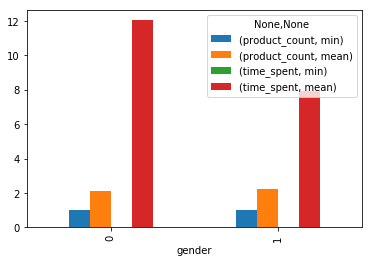

In [377]:
data.groupby('gender').agg(['min','mean']).plot(kind='bar')

In [389]:
test.product_count.mean()

2.2675555555555555

In [343]:
data.gender.value_counts()

1    8192
0    2308
Name: gender, dtype: int64

# Undersampling

In [82]:
shuffled = data.sample(frac=1, random_state=4)

In [87]:
fraud = shuffled.loc[shuffled['gender'] == 1].sample(n=2308,random_state=4)

In [88]:
nonfraud = shuffled.loc[shuffled['gender']==0].sample(n=2308, random_state=4)

In [89]:
nonfraud.shape

(2308, 3)

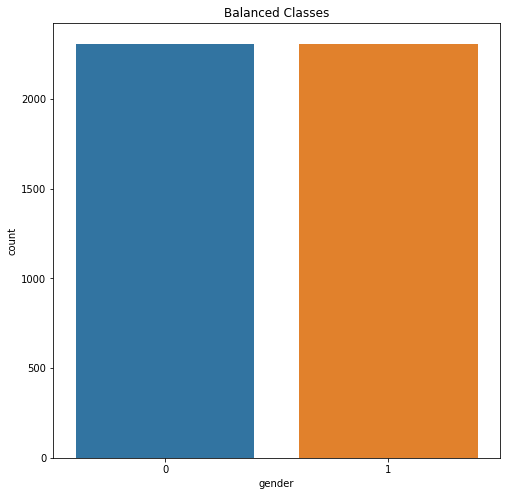

In [90]:
import seaborn as sns
normalized = pd.concat([fraud, nonfraud])
plt.figure(figsize=(8, 8))
sns.countplot('gender', data=normalized)
plt.title('Balanced Classes')
plt.show()

In [91]:
normalized.reset_index(inplace=True)

In [92]:
a=normalized.pop('index')


In [382]:
data = normalized

In [65]:
data.gender.value_counts()

1    8192
0    2308
Name: gender, dtype: int64

# Oversampling

In [232]:
# from imblearn.over_sampling import SMOTE

# # Resample the minority class. You can change the strategy to 'auto' if you are not sure.
# sm = SMOTE(sampling_strategy='minority', random_state=7)

# # Fit the model to generate the data.
# oversampled_trainX, oversampled_trainY = sm.fit_sample(credit_df.drop('Class', axis=1), credit_df['Class'])
# oversampled_train = pd.concat([pd.DataFrame(oversampled_trainY), pd.DataFrame(oversampled_trainX)], axis=1)
# oversampled_train.columns = normalized_df.columns

In [233]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority', random_state=7)

In [234]:
oversampled_trainX, oversampled_trainY = sm.fit_sample(data.drop('gender', axis=1), data['gender'])

In [235]:
oversampled_trainX.shape

(16384, 2)

In [236]:
oversampled_trainY.shape

(16384,)

In [237]:
oversampled_train = pd.concat([pd.DataFrame(oversampled_trainY), pd.DataFrame(oversampled_trainX)], axis=1)

In [238]:
oversampled_train.shape

(16384, 3)

In [239]:
oversampled_train.gender.value_counts()

1    8192
0    8192
Name: gender, dtype: int64

In [240]:
data = oversampled_train

In [241]:
data.head(3)

,gender,product_count,time_spent
0,1,4,1.0
1,0,7,6.0
2,1,1,0.0


In [242]:
data.gender.value_counts()

1    8192
0    8192
Name: gender, dtype: int64

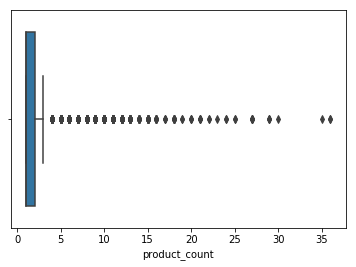

In [243]:
import seaborn as sns
sns.boxplot(x=data['product_count'])

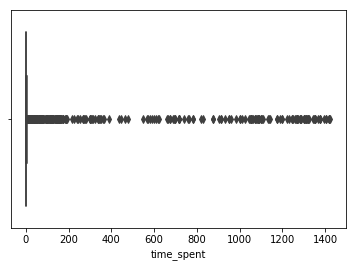

In [244]:
import seaborn as sns
sns.boxplot(x=data['time_spent'])

# TEST

In [378]:
test.head(5)

,session_id,startTime,endTime,ProductList
0,u12112,08/12/14 13:36,08/12/14 13:36,A00002/B00003/C00006/D19956/
1,u19725,19/12/14 13:52,19/12/14 13:52,A00002/B00005/C00067/D02026/
2,u11795,01/12/14 10:44,01/12/14 10:44,A00002/B00002/C00004/D12538/
3,u22639,08/12/14 20:19,08/12/14 20:22,A00002/B00003/C00079/D22781/;A00002/B00003/C00...
4,u18034,15/12/14 19:33,15/12/14 19:33,A00002/B00001/C00010/D23419/


In [379]:
num_of_prod = []
for i in range(test.shape[0]):
    num_of_prod.append(len(test.ProductList[i].split(';')))
    
test['product_count'] = num_of_prod

In [380]:
time_spent = []
for i in range(test.shape[0]):
    start_dt = dt.datetime.strptime(test.startTime[i].split(' ')[1], '%H:%M')
    end_dt = dt.datetime.strptime(test.endTime[i].split(' ')[1], '%H:%M')
    diff = end_dt - start_dt
    time_spent.append(diff.seconds/60)
    
test["time_spent"] = time_spent

In [381]:
test.head(4)

,session_id,startTime,endTime,ProductList,product_count,time_spent
0,u12112,08/12/14 13:36,08/12/14 13:36,A00002/B00003/C00006/D19956/,1,0.0
1,u19725,19/12/14 13:52,19/12/14 13:52,A00002/B00005/C00067/D02026/,1,0.0
2,u11795,01/12/14 10:44,01/12/14 10:44,A00002/B00002/C00004/D12538/,1,0.0
3,u22639,08/12/14 20:19,08/12/14 20:22,A00002/B00003/C00079/D22781/;A00002/B00003/C00...,4,3.0


In [382]:
test.drop(['session_id','startTime','endTime','ProductList'],axis=1, inplace=True)

In [383]:
test.head(3)

,product_count,time_spent
0,1,0.0
1,1,0.0
2,1,0.0


In [384]:
data.head(3)

,gender,product_count,time_spent
0,1,4,1.0
1,0,7,6.0
2,1,1,0.0


In [385]:
data.shape

(10500, 3)

In [386]:
data.describe()

,gender,product_count,time_spent
count,10500.000000,10500.000000,10500.000000
mean,0.780190,2.214381,8.816286
std,0.414137,2.311911,84.637362
min,0.000000,1.000000,0.000000
25%,1.000000,1.000000,0.000000
50%,1.000000,1.000000,0.000000
75%,1.000000,2.000000,2.000000
max,1.000000,36.000000,1425.000000


In [303]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# data.product_count = scaler.fit_transform(data.product_count)
# data.time_spent = scaler.fit_transform(data.time_spent)
# inverse transform
# inverse = scaler.inverse_transform(normalized)

In [387]:
x = data.drop(['gender'],axis=1)
y = data.gender

In [305]:
x=scaler.fit_transform(x)

In [306]:
test=scaler.fit_transform(test)

In [307]:
x.shape, y.shape

((10500, 2), (10500,))

In [308]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

LR: 0.780190 (0.009579)
LDA: 0.780190 (0.009579)
KNN: 0.756190 (0.027978)
CART: 0.773810 (0.011076)
NB: 0.776762 (0.010286)


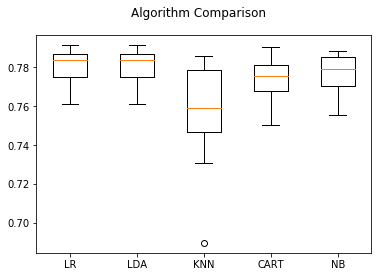

In [309]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
# models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
# scoring = 'roc_auc'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [310]:
from sklearn.metrics import accuracy_score

In [316]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
res = xgb. predict(x_test)
accuracy_score(res, y_test)

0.7825396825396825

In [312]:
from sklearn.metrics import confusion_matrix
confusion_matrix(res,y_test)

array([[   1,    3],
       [ 682, 2464]])

In [317]:
from sklearn.ensemble import AdaBoostClassifier
adc = AdaBoostClassifier(n_estimators=100, random_state=0)
adc.fit(x_train, y_train)
res = adc.predict(x_test)
accuracy_score(res, y_test)

0.7828571428571428

In [319]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 350, max_depth = 3)
rfc.fit(x_train, y_train)
res = rfc. predict(x_test)
accuracy_score(res, y_test)

0.7831746031746032

In [320]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(x_train, y_train)
res = rfc. predict(x_test)
accuracy_score(res, y_test)

0.7831746031746032

In [257]:
submit.head()

,session_id
0,u12112
1,u19725
2,u11795
3,u22639
4,u18034


In [258]:
ans = xgb.predict(test)
submit["gender"] = ans

In [259]:
d = {1:"female", 0:"male"}
submit.gender = [d[item] for item in submit.gender]

In [260]:
submit.gender.value_counts()

male      3294
female    1206
Name: gender, dtype: int64

In [261]:
submit.to_csv("answer_2.csv", index=False)

In [262]:
ls

answer_1.csv  Janata_hack_AV.ipynb   test.csv   Untitled.ipynb
answer_2.csv  sample_submission.csv  train.csv


In [57]:
# from  imblearn import *

In [58]:
# from imblearn import under_sampling, over_sampling


In [313]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier

#Create an object of the classifier.
bbc = BalancedBaggingClassifier(base_estimator=AdaBoostClassifier(n_estimators=500, random_state=0),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=4)
# bbc.fit(x_train, y_train)
# res = bbc. predict(x_test)
# accuracy_score(res, y_test)

In [314]:
bbc.fit(x_train, y_train)
res = bbc. predict(x_test)
accuracy_score(res, y_test)

0.35904761904761906

In [392]:
x.shape, y.shape

((10500, 2), (10500,))

# Using imblearn

In [396]:
from imblearn.under_sampling import NearMiss
nm=NearMiss()
new_x, new_y = nm.fit_sample(x,y)

In [399]:
new_x.shape, new_y.shape

((4616, 2), (4616,))

In [401]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(new_x,new_y, test_size=0.3, random_state=0)

In [402]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(x_train, y_train)
res = rfc. predict(x_test)
accuracy_score(res, y_test)

0.496028880866426

In [404]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
res = xgb. predict(x_test)
accuracy_score(res, y_test)

0.5350180505415163

In [406]:
new_x.head()

,product_count,time_spent
0,7,6.0
1,2,2.0
2,3,4.0
3,1,0.0
4,2,0.0


In [413]:
x = data.drop('gender', axis=1)
y=data.gender

In [416]:
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state=42)
x_res, y_res = smk.fit_sample(x,y)

In [417]:
x_res.shape, y_res.shape

((16318, 2), (16318,))

In [424]:
uni, count= np.unique(y_res, return_counts=True)

In [427]:
uni

array([0, 1])

In [429]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_res,y_res, test_size=0.3, random_state=0)

LR: 0.190565 (0.121903)
LDA: 0.190565 (0.121903)
KNN: 0.477220 (0.248611)
CART: 0.271091 (0.115691)
NB: 0.404229 (0.306758)


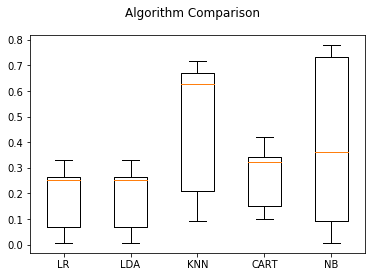

In [431]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
# models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
# scoring = 'roc_auc'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, x_res, y_res, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [432]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
res = xgb. predict(x_test)
accuracy_score(res, y_test)

0.5320669934640523